<a href="https://colab.research.google.com/github/swaroop-5-6-7/Internboot/blob/main/Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import os
import scipy

In [ ]:
loan_data = pd.read_csv('Loan_data_dataset.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df =  pd.read_csv('Loan_data_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP002990,1
LP001002,1
LP001003,1
LP001005,1
LP001006,1
...,...
LP001024,1
LP001020,1
LP001018,1


In [ ]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


/tmp/ipython-input-2644468465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette='hls')


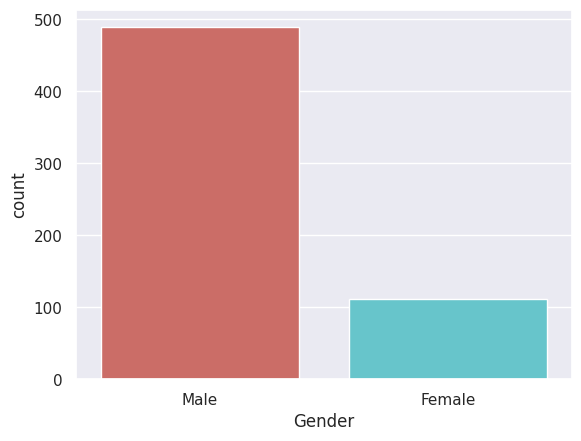

In [ ]:
sns.countplot(x = 'Gender', data = df, palette='hls')
plt.show();

In [ ]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


/tmp/ipython-input-228046893.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', data = df, palette='hls')


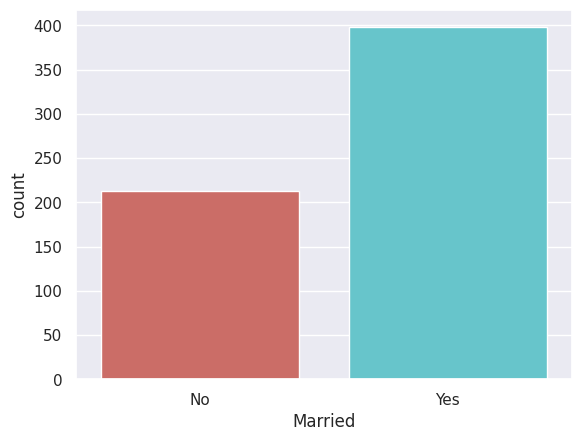

In [ ]:

sns.countplot(x = 'Married', data = df, palette='hls')
plt.show();

In [ ]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


/tmp/ipython-input-3952413334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Education', data = df, palette='hls')


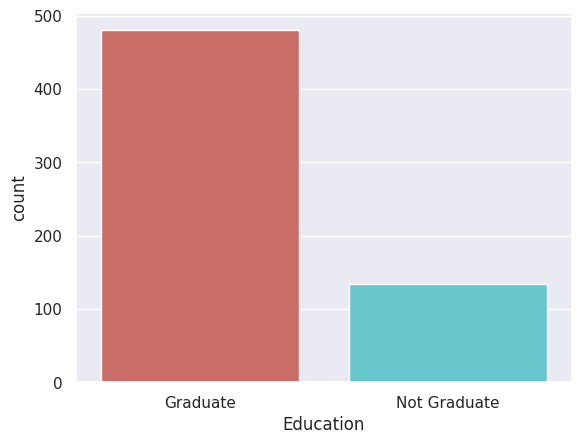

In [ ]:
sns.countplot(x = 'Education', data = df, palette='hls')
plt.show();

In [ ]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


/tmp/ipython-input-2030302228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Self_Employed', data = df, palette='hls')


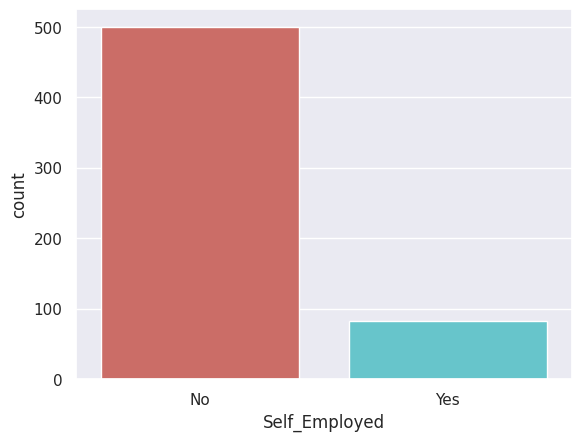

In [ ]:
sns.countplot(x = 'Self_Employed', data = df, palette='hls')
plt.show();

In [ ]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


/tmp/ipython-input-3922917601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Credit_History', data = df, palette='hls')


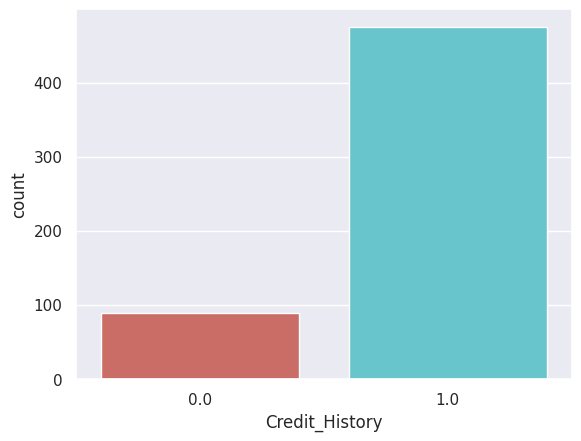

In [ ]:
sns.countplot(x = 'Credit_History', data = df, palette='hls')
plt.show();

In [ ]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


/tmp/ipython-input-927774992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Property_Area', data = df, palette='hls')


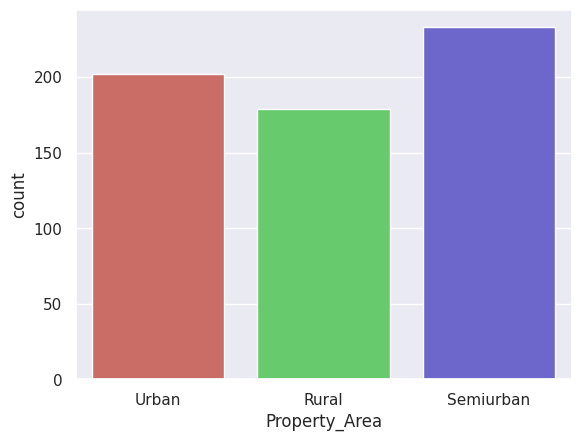

In [ ]:
sns.countplot(x = 'Property_Area', data = df, palette='hls')
plt.show();

In [ ]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


/tmp/ipython-input-705532365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Status', data = df, palette='hls')


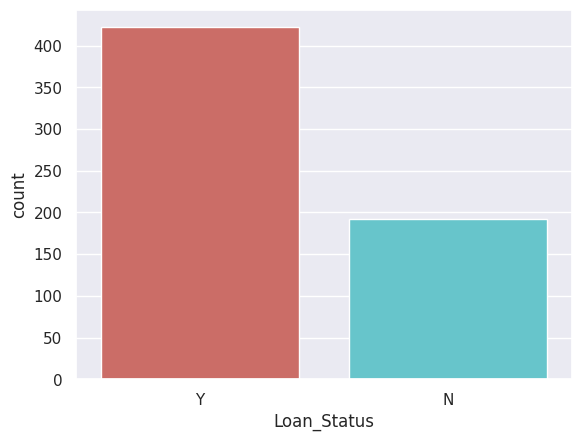

In [ ]:
sns.countplot(x = 'Loan_Status', data = df, palette='hls')
plt.show();

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2


/tmp/ipython-input-1817222182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Amount_Term', data = df, palette='hls')


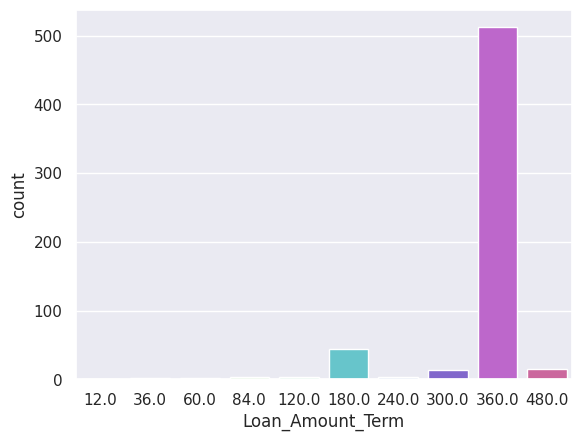

In [ ]:
sns.countplot(x = 'Loan_Amount_Term', data = df, palette='hls')
plt.show();

In [ ]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Histogram Distribution

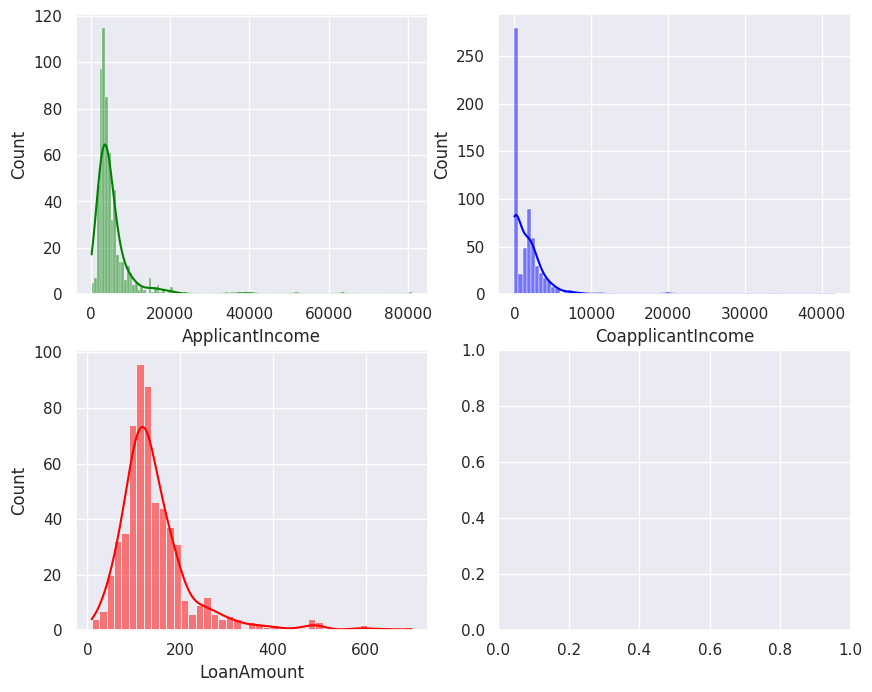

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data= df, x='ApplicantIncome', kde=True, ax = axs[0,0], color= 'green')
sns.histplot(data= df, x='CoapplicantIncome', kde=True, ax = axs[0,1], color= 'blue')
sns.histplot(data= df, x='LoanAmount', kde=True, ax = axs[1,0], color= 'red');


Violin Plot

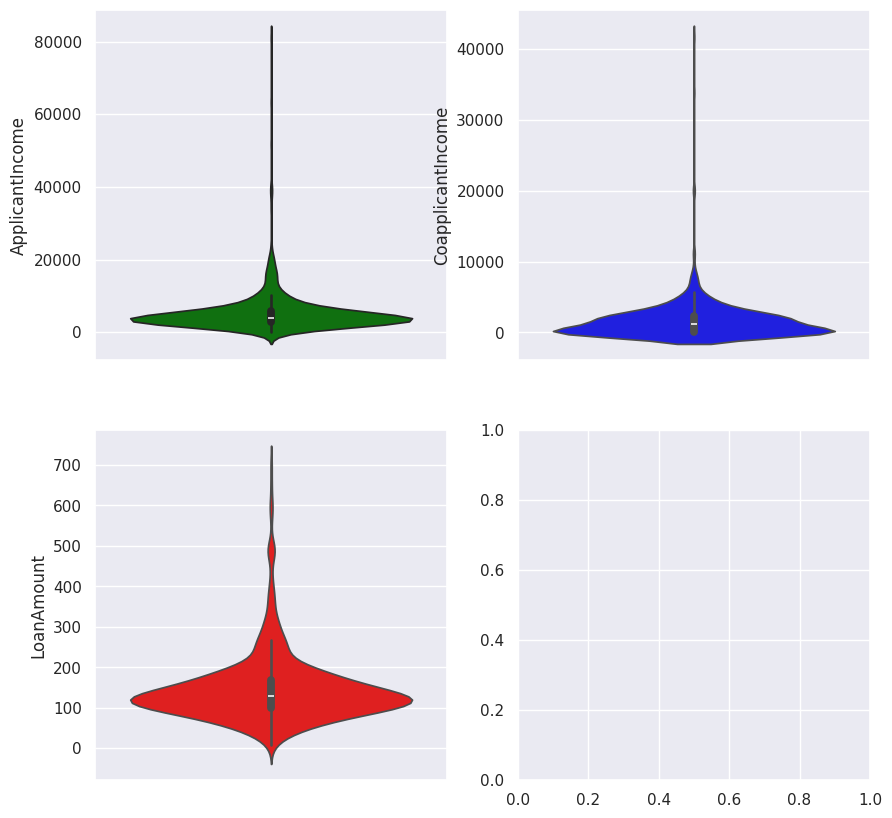

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data= df, y='ApplicantIncome', ax = axs[0,0], color= 'green')
sns.violinplot(data= df, y='CoapplicantIncome', ax = axs[0,1], color= 'blue')
sns.violinplot(data= df, y='LoanAmount', ax = axs[1,0], color= 'red');

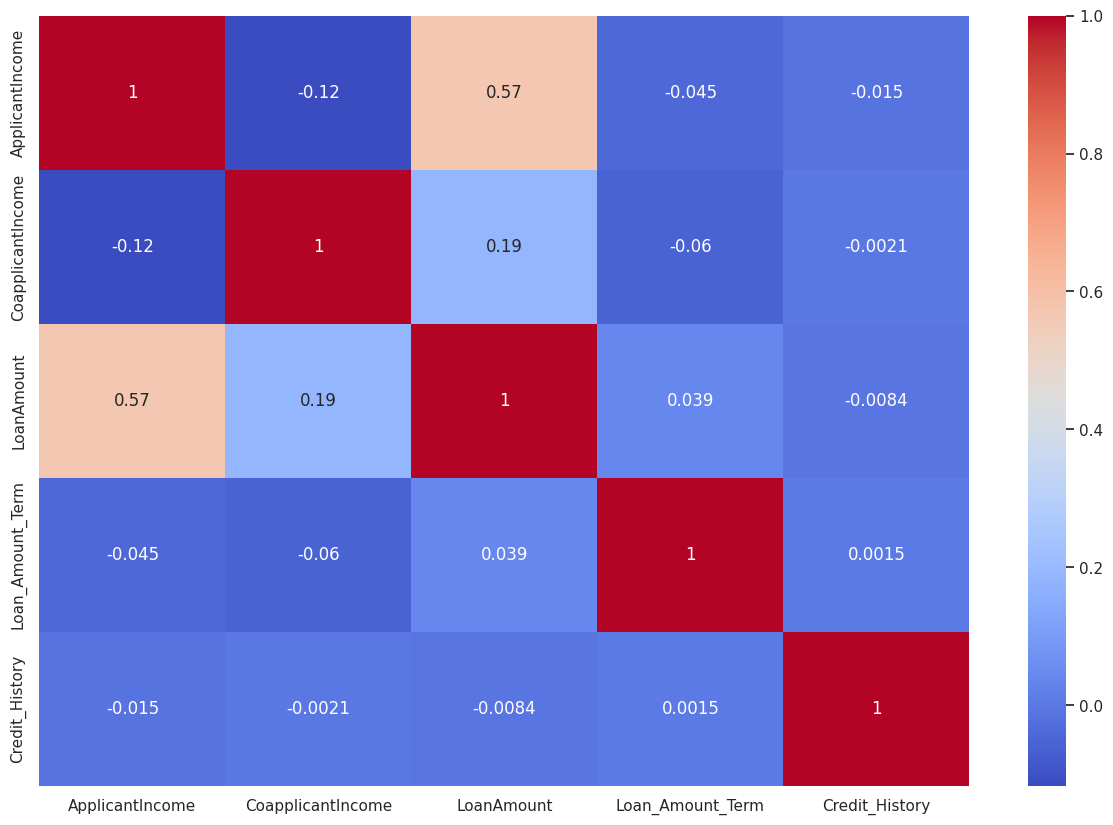

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm');

Categorical VS Categorical

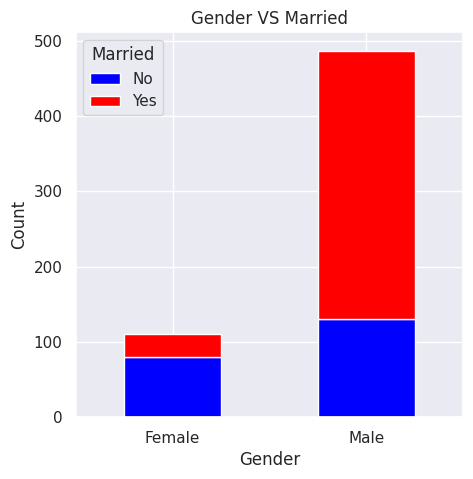

In [ ]:
pd.crosstab(df.Gender, df.Married).plot(kind='bar', stacked=True, figsize=(5,5), color=['blue','red'])
plt.title('Gender VS Married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

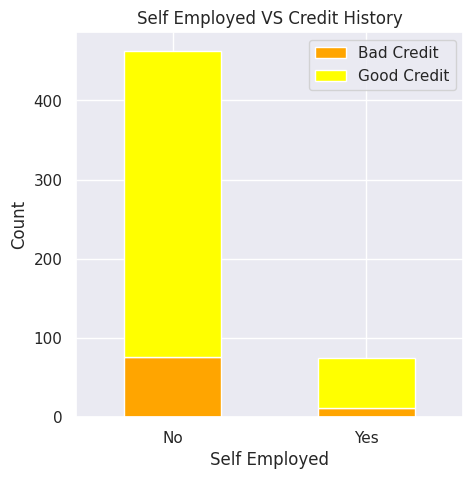

In [ ]:
pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind='bar', stacked=True, figsize=(5,5), color=['orange','yellow'])
plt.title('Self Employed VS Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(['Bad Credit', 'Good Credit'])
plt.xticks(rotation=0)
plt.show()

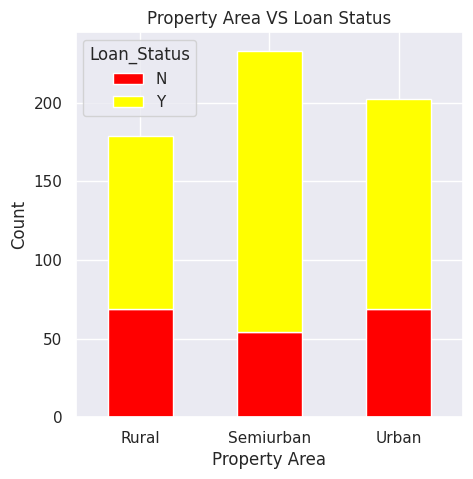

In [ ]:
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind='bar', stacked=True, figsize=(5,5), color=['red', 'yellow'])
plt.title('Property Area VS Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Categorical VS Numerical

/tmp/ipython-input-470365871.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='mako');


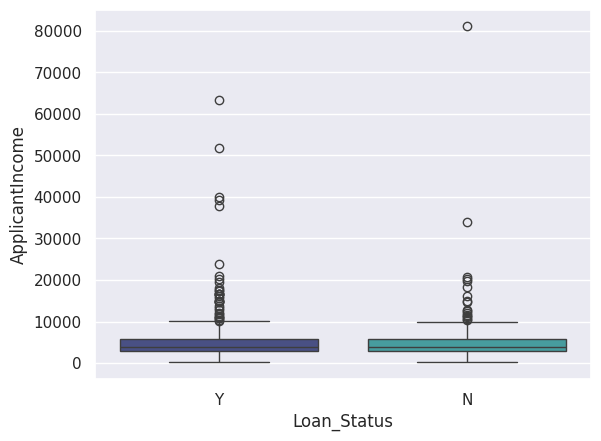

In [ ]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='mako');


/tmp/ipython-input-1304089002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Loan_Status', x='CoapplicantIncome', data=df, palette='rocket');


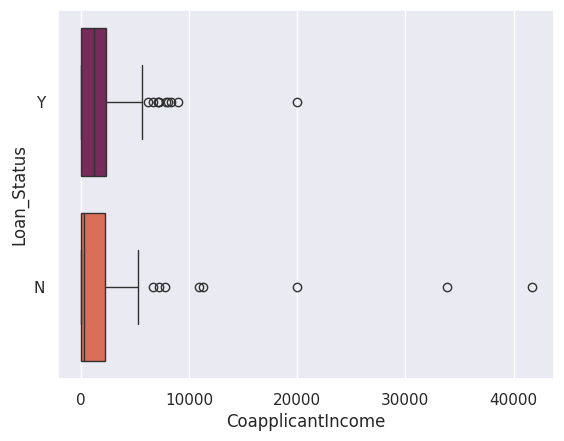

In [ ]:
sns.boxplot(y='Loan_Status', x='CoapplicantIncome', data=df, palette='rocket');

/tmp/ipython-input-244881599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='YlOrBr');


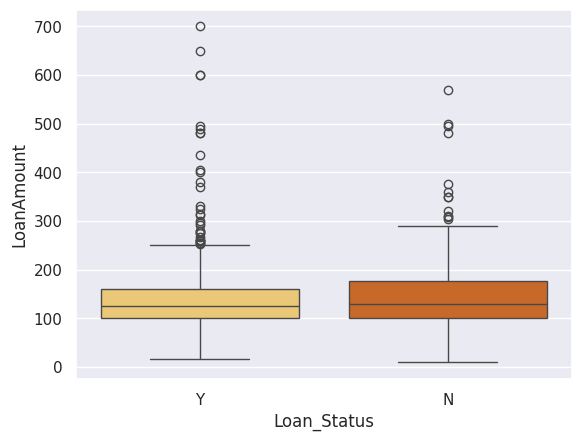

In [ ]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='YlOrBr');

Numerical VS Numerical

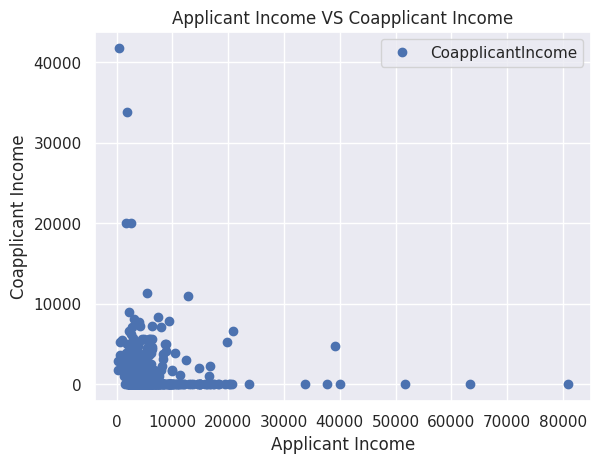

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=np.float64(13.835753259915665), pvalue=np.float64(1.460983948423972e-40), df=np.float64(1226.0))


In [ ]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income VS Coapplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'],df['CoapplicantIncome']))

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


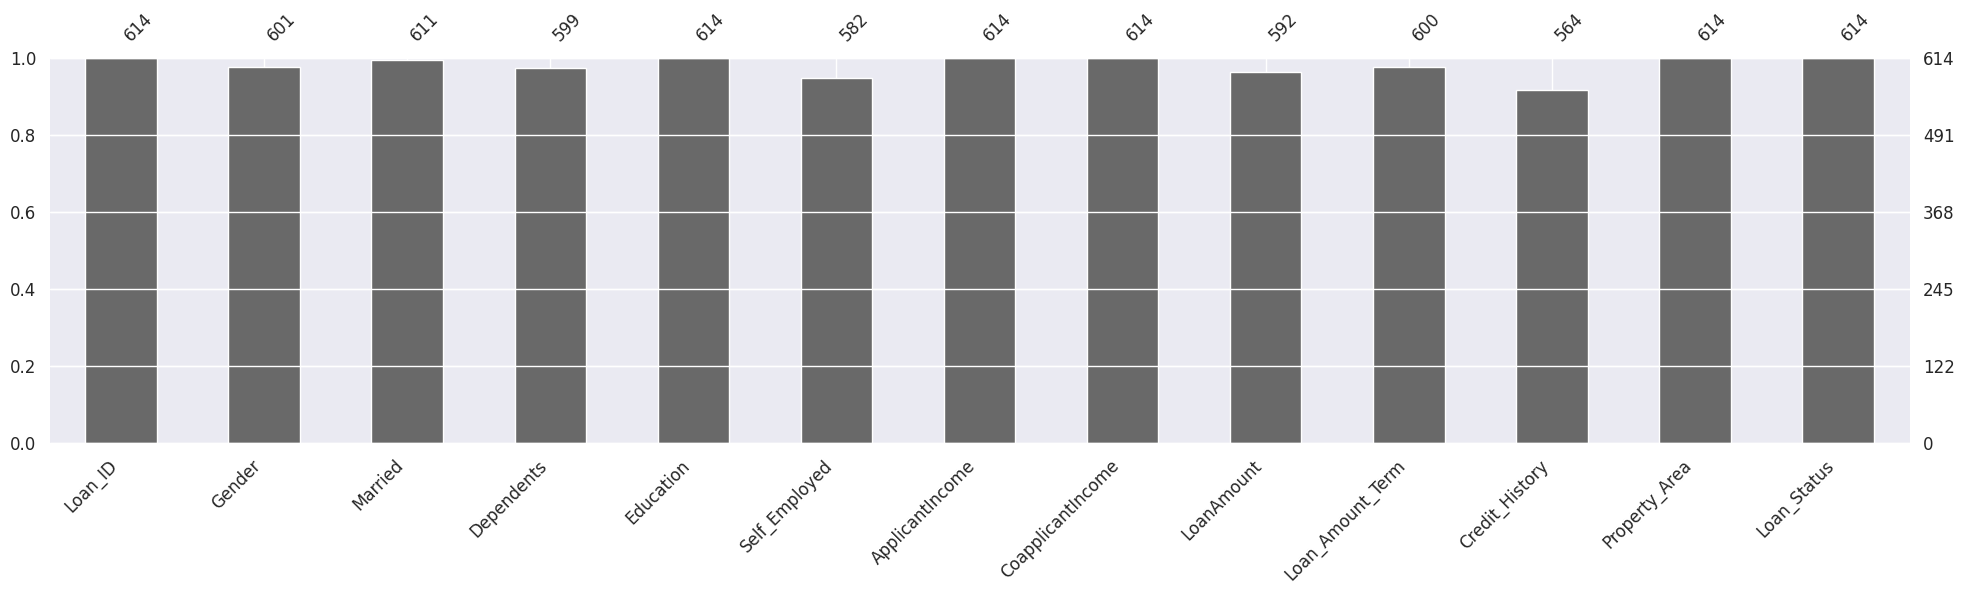

In [ ]:
msno.bar(df, figsize=(24, 5), fontsize=12);

Data Preprocessing

In [ ]:
df = df.drop(['Loan_ID'], axis = 1) # Dropped unecessary variables

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


For numerical variables

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

One-hot encoding

In [ ]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male':'Gender','Married_Yes': 'Married','Education_Graduate':'Education','Self_Employed_Yes':'Self_Employed','Loan_Status_Y':'Loan_Status'}
df = df.rename(columns=new)

Remove Outliers & Infinite values

In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((num_df < (Q1 - 1.5 * IQR)) |(num_df > (Q3 +1.5 * IQR))).any(axis=1)]

Skewed Distribution Treatment

In [ ]:
df.ApplicantIncome = np.log(df.ApplicantIncome)
df.CoapplicantIncome = np.log(df.CoapplicantIncome)
df.LoanAmount = np.log(df.LoanAmount)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


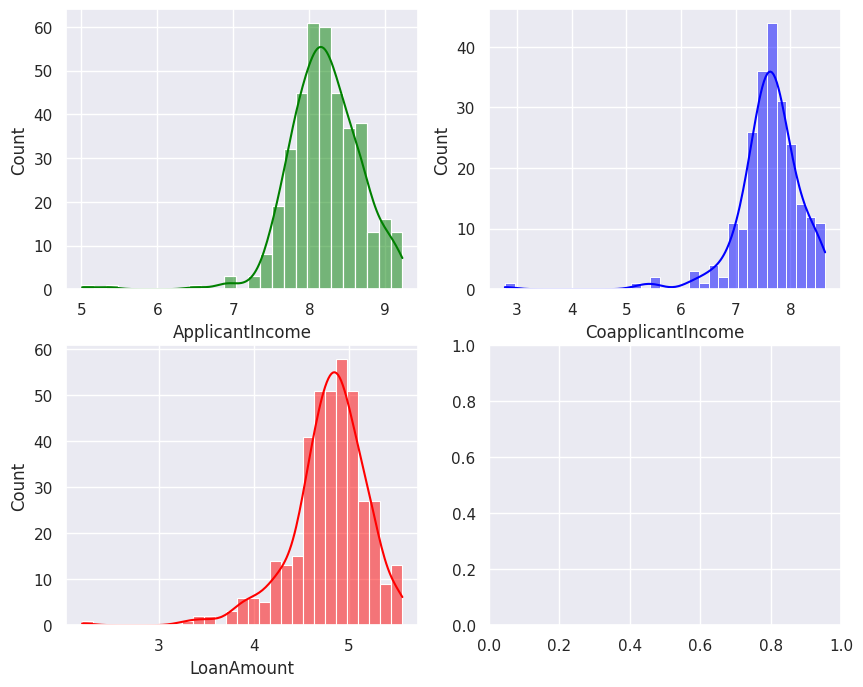

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data= df, x='ApplicantIncome', kde=True, ax = axs[0,0], color='green')
sns.histplot(data= df, x='CoapplicantIncome', kde=True, ax = axs[0,1], color = 'blue')
sns.histplot(data= df, x='LoanAmount', kde=True, ax = axs[1,0], color = 'red');

In [ ]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,8.674026,-inf,4.986426,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,8.430109,7.318540,4.852030,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,8.006368,-inf,4.189655,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,7.856707,7.765569,4.787492,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,8.699515,-inf,4.948760,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,8.290794,7.252054,5.056246,360.0,1.0,True,True,False,False,True,False,False,False,True,False,False,True
608,8.080856,7.575585,4.682131,360.0,1.0,True,True,True,False,False,False,True,False,True,False,False,True
609,7.972466,-inf,4.262680,360.0,1.0,False,False,True,False,False,False,True,False,True,False,False,True
611,8.996157,5.480639,5.533389,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True


Features Seperating

In [ ]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

SMOTE technique

In [ ]:
X.replace([np.inf, -np.inf], 0, inplace=True)
X, y = SMOTE().fit_resample(X, y)

/tmp/ipython-input-1582221587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette= 'coolwarm');


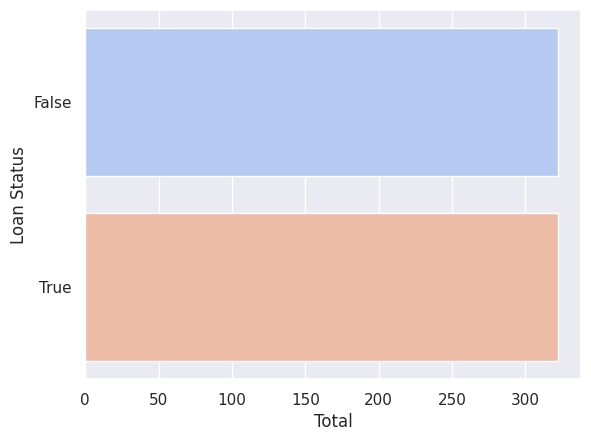

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(y=y, data=df, palette= 'coolwarm');
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

Data Normalization

In [ ]:
X = MinMaxScaler().fit_transform(X)

splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

####MODELS

Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver = 'saga', max_iter=1000, random_state = 1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_test, y_pred)
print("LR accuracy: {:.2f}%".format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.70      0.82      0.75        67
        True       0.76      0.61      0.68        62

    accuracy                           0.72       129
   macro avg       0.73      0.72      0.72       129
weighted avg       0.73      0.72      0.72       129

[[55 12]
 [24 38]]
LR accuracy: 72.09%


K-Nearest Neighbours (KNN)

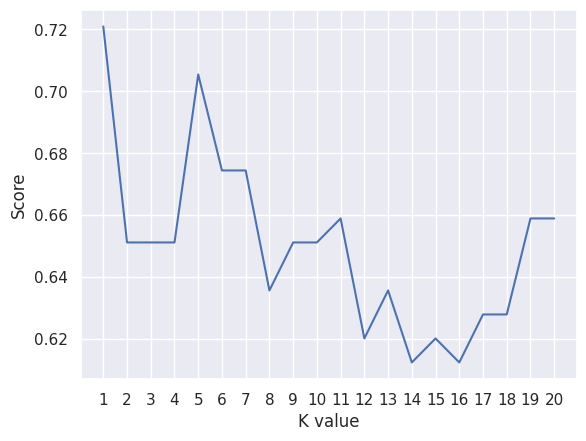

KNN accuracy: 72.09%


In [ ]:
scoreListknn = []
for i in range(1,21):
  KNclassifier = KNeighborsClassifier(n_neighbors = i)
  KNclassifier.fit(X_train, y_train)
  scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN accuracy: {:.2f}%".format(KNAcc*100))

SVM

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter = 1500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVMAcc = accuracy_score( y_pred, y_test)
print("SVM accuracy: {:.2f}%".format(SVMAcc*100))

              precision    recall  f1-score   support

       False       0.69      0.87      0.77        67
        True       0.80      0.58      0.67        62

    accuracy                           0.73       129
   macro avg       0.75      0.72      0.72       129
weighted avg       0.74      0.73      0.72       129

[[58  9]
 [26 36]]
SVM accuracy: 72.87%


#####Naive Bayes

Gaussian NB

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc = accuracy_score(y_test, y_pred)
print("NB accuracy: {:.2f}%".format(NBAcc*100))

              precision    recall  f1-score   support

       False       0.57      0.70      0.63        67
        True       0.57      0.44      0.50        62

    accuracy                           0.57       129
   macro avg       0.57      0.57      0.56       129
weighted avg       0.57      0.57      0.57       129

[[47 20]
 [35 27]]
NB accuracy: 57.36%


Decision Tree

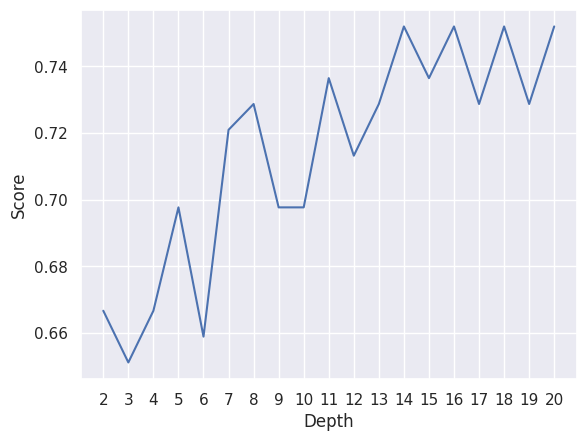

DT accuracy: 75.19%


In [ ]:
scoreListDT = []
for i in range(2,21):
  DTClassifier = DecisionTreeClassifier(max_depth = i)
  DTClassifier.fit(X_train, y_train)
  scoreListDT.append(DTClassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Depth")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("DT accuracy: {:.2f}%".format(DTAcc*100))

Random Forest

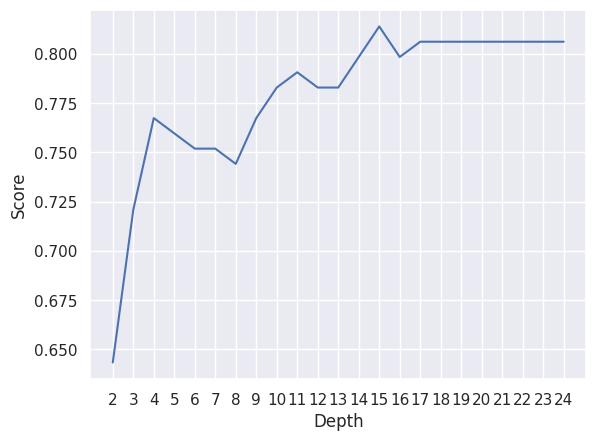

RF accuracy: 81.40%


In [ ]:
scoreListRF = []
for i in range(2,25):
  RFClassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_depth=i)
  RFClassifier.fit(X_train, y_train)
  scoreListRF.append(RFClassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Depth")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("RF accuracy: {:.2f}%".format(RFAcc*100))

Model Comparison

In [ ]:
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbours', 'SVM', 'Naive Bayes(Gaussian NB)', 'Decision Tree', 'Random Forest'],
    'Accuracy': [LRAcc*100, KNAcc*100, SVMAcc*100, NBAcc*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,81.395349
4,Decision Tree,75.193798
2,SVM,72.868217
0,Logistic Regression,72.093023
1,K-Nearest Neighbours,72.093023
3,Naive Bayes(Gaussian NB),57.364341
